리뷰데이터 가져오기 / 전처리

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 기본 패키지 불러오기

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import matplotlib as mpl
from matplotlib import font_manager, rc

# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 글꼴 경로 지정
font_path = '/content/drive/MyDrive/예진/malgun.ttf'

# 폰트 이름 얻어오기
font_name = font_manager.FontProperties(fname=font_path).get_name()

# matplotlib의 rc(run command) 기능을 이용하여 글꼴 설정
mpl.rc('font', family=font_name)

# 유니코드에서  음수 부호 설정
mpl.rc('axes', unicode_minus=False)

# 데이터 불러오기

path = '/content/drive/MyDrive/Data/Airbnb_London/combined_reviews.csv'


df_review = pd.read_csv(path, encoding='utf-8')

df_review.dropna(subset=['리뷰'],inplace=True)

#date >> 데이터타입 변경 datatime

df_review['리뷰날짜'] = pd.to_datetime(df_review['리뷰날짜'])



In [4]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
Index: 671964 entries, 0 to 671965
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   숙소_id   671964 non-null  int64         
 1   리뷰날짜    671964 non-null  datetime64[ns]
 2   리뷰      671964 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 20.5+ MB


In [5]:
df_review.head()

,숙소_id,리뷰날짜,리뷰
0,13913,2010-08-18,My girlfriend and I hadn't known Alina before ...
1,13913,2011-07-11,Alina was a really good host. The flat is clea...
2,13913,2011-09-13,Alina is an amazing host. She made me feel rig...
3,13913,2011-10-03,"Alina's place is so nice, the room is big and ..."
4,13913,2011-10-09,"Nice location in Islington area, good for shor..."


랜덤 20000만개 데이터 추출

In [ ]:
import pandas as pd

# 리뷰 데이터가 담긴 DataFrame (예: df)
# 예시로 df를 생성합니다. 실제 데이터 프레임을 사용하세요.
# df = pd.read_csv('path_to_your_file.csv')

# 10,000개의 랜덤 샘플 추출
random_sample = df_review.sample(n=20000, random_state=42)

# 결과를 확인합니다.
print(random_sample)

           숙소_id       리뷰날짜                                                 리뷰
475762  28599087 2022-03-20  We had a great trip, the airbnb is great and v...
266231  14378646 2022-11-18      Great Area, great hosts and a very comfy bed.
555       165336 2022-08-25  Had a wonderful stay at Nathan’s. Loved the ec...
495255  30536724 2023-12-02  Clean,Comfy and a Peaceful space..There are 5 ...
409887  22592225 2019-11-15  Yvonne’s place was lovely and comfortable. She...
...          ...        ...                                                ...
73289    1739911 2015-06-02  This is the perfect place to stay for Brick La...
622110  15996748 2018-02-18  A private room in a shared apartment. It is ne...
316021  17231704 2018-07-18  Very small room and not enough room for a chai...
20097     390750 2017-06-16  Great location and easy access to transportati...
420177  23638870 2021-01-11  This space has wonderful views  along with a g...

[20000 rows x 3 columns]


In [ ]:
# random_sample.to_csv('/content/drive/MyDrive/Data/Airbnb_London/random_reivew_20000.csv', encoding='utf-8', index=False)

In [ ]:
# !pip install nltk
# !pip install wordcloud

In [6]:

path = '/content/drive/MyDrive/Data/Airbnb_London/random_reivew_20000.csv'


random_sample = pd.read_csv(path, encoding='utf-8')

In [7]:
# !pip install textblob

import nltk
nltk.download('brown')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('conll2000')
nltk.download('movie_reviews')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

텍스트 전처리


- 소문자로 변경
- 토큰화
- 불용어 제거
- 어간 추출


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import glob
import re  #정규표현식

from functools import reduce #2차원 >> 1차원

from nltk.tokenize import word_tokenize # word >> token
from nltk.corpus import stopwords  #stopwords >> 불용어
from nltk.stem import WordNetLemmatizer # 어간 분석

from collections import Counter

from wordcloud import STOPWORDS, WordCloud

stopWords = set(stopwords.words('english'))
lemma = WordNetLemmatizer()

words = []
def Pretreatment(text):

    for title in random_sample['리뷰']:
        en_words = re.sub(r"[^a-zA-Z]+"," ",str(title)) #정규표현식 사용, 영문 대소문자 ^ 제외한 문자를 공백 (" ")변경
        en_words_token = word_tokenize(en_words.lower()) # 변환 된 단어를 토큰화
        en_words_stop = [word for word in en_words_token if not word in stopWords] # 불용어 제거
        en_words_lemma = [lemma.lemmatize(word) for word in en_words_stop]  #어간 추출
        words.append(en_words_lemma)

# #진행사항 표시
tqdm.pandas()


Pretreatment(random_sample['리뷰'])

In [9]:
word_list = list(reduce(lambda x, y: x + y, words))

In [10]:
word_list

['great',
 'trip',
 'airbnb',
 'great',
 'well',
 'located',
 'great',
 'area',
 'great',
 'host',
 'comfy',
 'bed',
 'wonderful',
 'stay',
 'nathan',
 'loved',
 'eclectic',
 'decor',
 'prime',
 'location',
 'notting',
 'hill',
 'step',
 'tube',
 'communication',
 'great',
 'able',
 'personally',
 'check',
 'walk',
 'everything',
 'house',
 'plus',
 'left',
 'detailed',
 'instruction',
 'everything',
 'worked',
 'great',
 'lovely',
 'comfortable',
 'base',
 'time',
 'london',
 'would',
 'definitely',
 'stay',
 'clean',
 'comfy',
 'peaceful',
 'space',
 'room',
 'house',
 'everything',
 'peaceful',
 'felt',
 'like',
 'one',
 'shower',
 'bathroom',
 'hardly',
 'luck',
 'need',
 'kitchen',
 'clean',
 'cupboard',
 'refrigerator',
 'shelf',
 'partitioned',
 'labelled',
 'room',
 'storage',
 'standard',
 'shared',
 'accommodation',
 'aspire',
 'thanks',
 'ben',
 'yvonne',
 'place',
 'lovely',
 'comfortable',
 'great',
 'host',
 'location',
 'perfect',
 'seeing',
 'gig',
 'alexandra',
 'palac

In [11]:
pd.Series(word_list).value_counts().head(20)

great          9696
stay           9555
place          7867
location       6625
host           6346
london         6191
clean          5767
room           5523
apartment      4612
nice           4500
good           4259
would          4184
comfortable    3840
recommend      3810
really         3532
well           3483
everything     3477
lovely         3414
flat           3390
u              3381
Name: count, dtype: int64

불용어 추가 제거

In [12]:
# 기본 NLTK 불용어
stopwords = set(stopwords.words('english'))

add_stopwords = ['great', 'good', 'nice', 'would', 'place', 'stay','apartment','house','room','host','comfortable',
             'amazing','perfect','wonderful','excellent','lovely','highly','recommend','definitely', 'really',
             'london','u', 'everything', 'well', 'home','helpful','also','like','location','staying','could','need',
             'airbnb', 'london', 'host','everything','room']

# 전체 불용어 집합
custom_stopwords = stopwords.union(add_stopwords)

def remove_stopwords(tokenized_words, stopwords):

    filtered_words = [word for word in tokenized_words if word.lower() not in stopwords]
    return filtered_words

tokenized_words = word_list

# 불용어 제거
filtered_words = remove_stopwords(tokenized_words, custom_stopwords)



In [13]:
filtered_words

['trip',
 'located',
 'area',
 'comfy',
 'bed',
 'nathan',
 'loved',
 'eclectic',
 'decor',
 'prime',
 'notting',
 'hill',
 'step',
 'tube',
 'communication',
 'able',
 'personally',
 'check',
 'walk',
 'plus',
 'left',
 'detailed',
 'instruction',
 'worked',
 'base',
 'time',
 'clean',
 'comfy',
 'peaceful',
 'space',
 'peaceful',
 'felt',
 'one',
 'shower',
 'bathroom',
 'hardly',
 'luck',
 'kitchen',
 'clean',
 'cupboard',
 'refrigerator',
 'shelf',
 'partitioned',
 'labelled',
 'storage',
 'standard',
 'shared',
 'accommodation',
 'aspire',
 'thanks',
 'ben',
 'yvonne',
 'seeing',
 'gig',
 'alexandra',
 'palace',
 'flat',
 'close',
 'several',
 'tube',
 'station',
 'restaurant',
 'fantastic',
 'communicative',
 'code',
 'enabled',
 'door',
 'tricky',
 'manage',
 'close',
 'station',
 'convenient',
 'advertised',
 'worked',
 'perfectly',
 'plan',
 'emphasized',
 'enough',
 'central',
 'james',
 'work',
 'check',
 'viktor',
 'flat',
 'located',
 'comfy',
 'clean',
 'friend',
 'enjoye

In [14]:
import nltk
from nltk.tag import pos_tag
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

토큰화한 단어들 중 명사만 추출

In [15]:
def extract_nouns(filtered_word_list):
    tagged_words = pos_tag(filtered_word_list)
    nouns = [word for word, pos in tagged_words if pos.startswith('NN')]
    return nouns

filtered_word_list = filtered_words
word_list_nouns = extract_nouns(filtered_word_list)
word_list_nouns

['trip',
 'area',
 'comfy',
 'decor',
 'notting',
 'step',
 'tube',
 'communication',
 'walk',
 'instruction',
 'time',
 'comfy',
 'space',
 'peaceful',
 'shower',
 'bathroom',
 'cupboard',
 'refrigerator',
 'shelf',
 'storage',
 'standard',
 'accommodation',
 'aspire',
 'thanks',
 'palace',
 'tube',
 'station',
 'restaurant',
 'code',
 'manage',
 'station',
 'convenient',
 'james',
 'check',
 'viktor',
 'friend',
 'vacation',
 'phone',
 'travel',
 'zhuoli',
 'trouble',
 'relocate',
 'zhuoli',
 'minute',
 'change',
 'hr',
 'time',
 'change',
 'time',
 'zhuoli',
 'apt',
 'criterion',
 'comment',
 'change',
 'star',
 'rating',
 'area',
 'noise',
 'people',
 'week',
 'weekend',
 'bar',
 'difficulty',
 'heat',
 'bit',
 'bed',
 'bathroom',
 'floor',
 'addition',
 'ease',
 'check',
 'check',
 'mo',
 'paul',
 'superb',
 'help',
 'service',
 'communication',
 'anyone',
 'weekend',
 'holiday',
 'comfy',
 'bedroom',
 'bathroom',
 'david',
 'partner',
 'dog',
 'vauxhall',
 'stockwell',
 'tube',
 

In [16]:
pd.Series(word_list_nouns).value_counts().head(20)


station          2940
time             2510
area             2355
bathroom         1710
day              1608
tube             1605
minute           1546
bus              1518
night            1489
restaurant       1433
space            1405
walk             1358
communication    1311
lot              1215
check            1189
thanks           1176
kind             1150
accommodation    1144
street           1108
city             1103
Name: count, dtype: int64

불용어를 더 제거할 필요가 있어보임

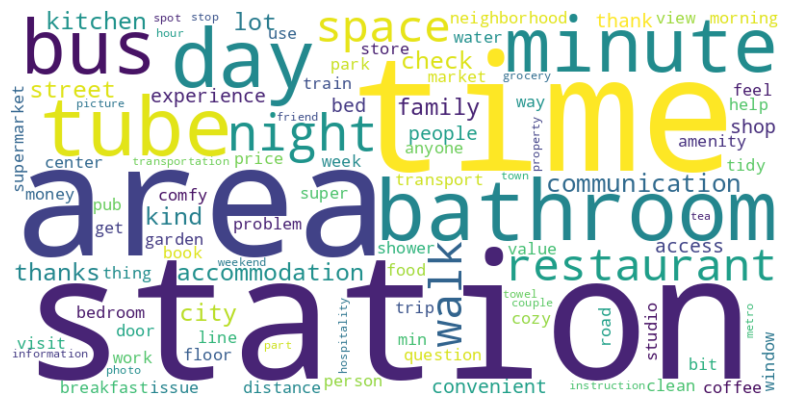

In [17]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

word_counts = pd.Series(word_list_nouns).value_counts().head(100)

# 워드클라우드를 생성
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

토픽 모델링을 해보자

In [57]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from gensim import corpora
from gensim.models import LdaModel

# NLTK 데이터 다운로드
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')

# 예시 리뷰 데이터
reviews = random_sample['리뷰']

# 불용어 설정
nltk_stopwords = set(stopwords.words('english'))
additional_stopwords = {'airbnb', 'london'}  # 사용자 지정 불용어 추가
custom_stopwords = nltk_stopwords.union(additional_stopwords)


def preprocess_text(text, stopwords):

    # 소문자 변환 및 특수 문자 제거
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # 토큰화
    words = word_tokenize(text)

    # 불용어 제거
    filtered_words = [word for word in words if word not in stopwords]

    # 품사 태그 부여 및 명사 필터링
    tagged_words = pos_tag(filtered_words)
    nouns = [word for word, tag in tagged_words if tag in ['NN']]

    return nouns

# 모든 리뷰에 대해 전처리 수행
processed_texts = [preprocess_text(text, custom_stopwords) for text in reviews]

# 사전 생성 및 말뭉치 변환
dictionary = corpora.Dictionary(processed_texts)
corpus = [dictionary.doc2bow(text) for text in processed_texts]

# LDA 모델 학습
lda_model = LdaModel(corpus, num_topics=6, id2word=dictionary, passes=10)

# 토픽 출력
for i, topic in lda_model.print_topics(-1):
    print(f"Topic {i}: {topic}")


Topic 0: 0.054*"station" + 0.043*"house" + 0.031*"location" + 0.028*"tube" + 0.024*"room" + 0.023*"bus" + 0.022*"walk" + 0.021*"place" + 0.020*"stay" + 0.018*"city"
Topic 1: 0.101*"room" + 0.078*"host" + 0.048*"location" + 0.043*"house" + 0.036*"stay" + 0.020*"space" + 0.017*"communication" + 0.017*"kind" + 0.016*"helpful" + 0.016*"experience"
Topic 2: 0.170*"place" + 0.112*"stay" + 0.100*"location" + 0.059*"host" + 0.031*"home" + 0.024*"value" + 0.015*"perfect" + 0.014*"communication" + 0.014*"money" + 0.012*"convenient"
Topic 3: 0.147*"apartment" + 0.053*"accommodation" + 0.043*"time" + 0.037*"location" + 0.013*"neighborhood" + 0.013*"access" + 0.012*"recommend" + 0.010*"communication" + 0.010*"family" + 0.009*"pleasant"
Topic 4: 0.069*"room" + 0.046*"bathroom" + 0.028*"kitchen" + 0.023*"bedroom" + 0.021*"bed" + 0.019*"floor" + 0.017*"water" + 0.017*"home" + 0.015*"night" + 0.014*"use"
Topic 5: 0.099*"everything" + 0.036*"stay" + 0.032*"apartment" + 0.030*"host" + 0.030*"place" + 0.0

감성 분석

In [ ]:
!pip install textblob

In [18]:
reviews = random_sample['리뷰']

In [19]:
from textblob import TextBlob
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# 예시 텍스트 리스트
texts = reviews

# 긍정 및 부정 단어 저장을 위한 Counter 초기화
positive_words = Counter()
negative_words = Counter()

# 전체 단어 수를 저장할 변수 초기화
total_word_count = 0

# 각 텍스트에 대해 감성 분석 수행 및 결과 출력
for i, text in enumerate(texts):
    # 텍스트 전처리 (소문자 변환, 특수 문자 제거)
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    #불용어 제거
    words = [word for word in text.split() if word not in stop_words]

    total_word_count += len(words)

    # TextBlob을 사용하여 감성 분석 수행
    blob = TextBlob(text)
    sentiment = blob.sentiment

    # 단어를 분할하여 긍정 및 부정 단어로 분류
    words = text.split()

    for word in words:
        word_blob = TextBlob(word)
        if word_blob.sentiment.polarity > 0:
            positive_words[word] += 1
        elif word_blob.sentiment.polarity < 0:
            negative_words[word] += 1

# 긍정 단어의 총 수 계산
total_positive_words = sum(positive_words.values())
total_negative_words = sum(negative_words.values())


# 긍정 및 부정 단어 빈도수 출력
print("Positive words frequency:", positive_words)
print("Negative words frequency:", negative_words)
print("Total word count:", total_word_count)
print("Total positive words count:", total_positive_words)
print("Total negative words count:", total_negative_words)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Positive words frequency: Counter({'very': 15980, 'great': 9662, 'clean': 5726, 'nice': 4487, 'good': 4217, 'comfortable': 3815, 'really': 3527, 'lovely': 3405, 'perfect': 2834, 'easy': 2821, 'friendly': 2314, 'highly': 1809, 'excellent': 1513, 'beautiful': 1502, 'super': 1495, 'wonderful': 1395, 'amazing': 1292, 'thanks': 1178, 'much': 1174, 'enjoyed': 1158, 'kind': 1120, 'more': 1055, 'warm': 952, 'fantastic': 940, 'right': 923, 'loved': 866, 'many': 859, 'best': 789, 'near': 782, 'welcome': 775, 'quick': 712, 'pleasant': 697, 'first': 682, 'safe': 668, 'absolutely': 611, 'exactly': 599, 'most': 562, 'better': 561, 'available': 546, 'sure': 522, 'tidy': 510, 'able': 478, 'quickly': 453, 'large': 443, 'far': 441, 'modern': 439, 'love': 426, 'happy': 402, 'easily': 391, 'ideal': 379, 'perfectly': 368, 'light': 358, 'peaceful': 354, 'appreciated': 344, 'own': 333, 'early': 331, 'stylish': 329, 'pretty': 327, 'full': 323, 'clear': 314, 'attentive': 313, 'cute': 313, 'high': 298, 'bright'

In [20]:
# 긍정 단어와 부정 단어에서 명사만 추출
def extract_nouns(word_counter):
    nouns = Counter()
    for word in word_counter:
        word_blob = TextBlob(word)
        pos_tags = nltk.pos_tag([word])
        if pos_tags[0][1] in ['NN', 'NNS', 'NNP', 'NNPS']:  # 명사 태그
            nouns[word] += word_counter[word]
    return nouns

In [21]:
positive_nouns = extract_nouns(positive_words)
negative_nouns = extract_nouns(negative_words)

In [22]:
positive_nouns

Counter({'wonderful': 1395,
         'peaceful': 354,
         'clean': 5726,
         'perfect': 2834,
         'sure': 522,
         'super': 1495,
         'apt': 58,
         'loud': 112,
         'superb': 144,
         'beautiful': 1502,
         'cool': 226,
         'excellent': 1513,
         'thanks': 1178,
         'bright': 292,
         'absolute': 68,
         'phenomenal': 20,
         'warm': 952,
         'calm': 162,
         'quick': 712,
         'kind': 1120,
         'tidy': 510,
         'worth': 195,
         'stylish': 329,
         'right': 923,
         'fine': 246,
         'welcome': 775,
         'fast': 247,
         'accurate': 120,
         'delightful': 92,
         'light': 358,
         'pleasant': 697,
         'awesome': 221,
         'ideal': 379,
         'brilliant': 219,
         'fly': 4,
         'offers': 95,
         'cute': 313,
         'sound': 63,
         'respectful': 64,
         'wise': 17,
         'ok': 165,
         'love': 426,


In [23]:
negative_nouns

Counter({'base': 184,
         'dirty': 101,
         'spent': 232,
         'sad': 27,
         'center': 514,
         'cozy': 793,
         'dusty': 28,
         'cold': 160,
         'dark': 57,
         'toilet': 222,
         'firm': 19,
         'complaint': 23,
         'wet': 25,
         'fluffy': 13,
         'dry': 41,
         'round': 70,
         'mean': 25,
         'ill': 138,
         'rude': 14,
         'nostalgic': 1,
         'inconvenient': 28,
         'creepy': 3,
         'rank': 2,
         'bland': 2,
         'minimal': 19,
         'mess': 7,
         'past': 27,
         'half': 92,
         'sorry': 24,
         'tries': 9,
         'broken': 71,
         'faint': 2,
         'endless': 6,
         'afraid': 11,
         'narrow': 75,
         'brutal': 2,
         'filthy': 6,
         'disappointment': 15,
         'careful': 48,
         'everyday': 35,
         'thin': 72,
         'crap': 2,
         'messy': 18,
         'odd': 16,
         'minor'

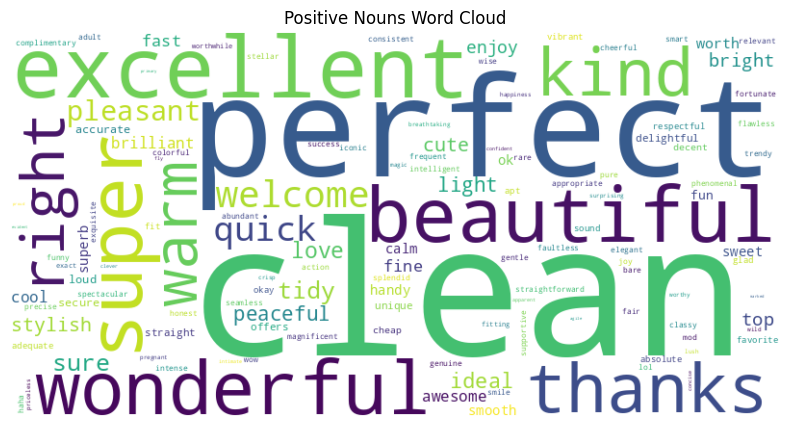

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 긍정 명사 워드클라우드 생성 및 시각화
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(positive_nouns)
plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Nouns Word Cloud')
plt.show()

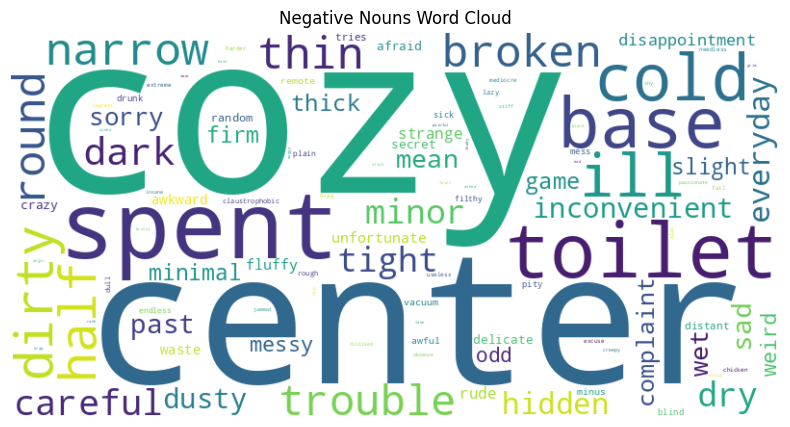

In [25]:
# 부정 명사 워드클라우드 생성 및 시각화
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(negative_nouns)
plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Nouns Word Cloud')
plt.show()

TF-IDF 실행

In [ ]:
# !pip install scikit-learn

In [26]:
reviews = random_sample['리뷰']

- 텍스트 전처리
- 소문자로 변경
- 불용어 제거

In [27]:
import re

def reviews_Pretreatment(texts):
    cleaned_texts = []
    for text in texts:
        cleaned_text = text.lower()  # 소문자로 변환
        cleaned_text = re.sub(r'[^a-zA-Z\s]+', '', cleaned_text)  # 특수문자 제거
        cleaned_texts.append(cleaned_text)
    return cleaned_texts


# 텍스트 전처리 수행
cleaned_reviews = reviews_Pretreatment(random_sample['리뷰'])

# 전처리된 텍스트로 '리뷰' 컬럼 업데이트
random_sample['리뷰'] = cleaned_reviews

# 결과 출력
random_sample.head()

,숙소_id,리뷰날짜,리뷰
0,28599087,2022-03-20,we had a great trip the airbnb is great and ve...
1,14378646,2022-11-18,great area great hosts and a very comfy bed
2,165336,2022-08-25,had a wonderful stay at nathans loved the ecle...
3,30536724,2023-12-02,cleancomfy and a peaceful spacethere are room...
4,22592225,2019-11-15,yvonnes place was lovely and comfortable she w...


분석 모델 구축

In [29]:
import pandas as pd
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

def get_sentiment_label(review):
    # TextBlob을 사용하여 감성 분석 수행
    analysis = TextBlob(review)
    return 1 if analysis.sentiment.polarity > 0 else 0

# 감성 분석을 수행하고 레이블 추가
random_sample['감성분류'] = random_sample['리뷰'].apply(get_sentiment_label)



In [30]:
random_sample['감성분류'].value_counts()

감성분류
1    19426
0      574
Name: count, dtype: int64

In [31]:
# tf-idf 벡터화
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(random_sample['리뷰'])

# 데이터와 레이블을 train/test로 분리
X_train, X_test, y_train, y_test = train_test_split(tfidf, random_sample['감성분류'], test_size=0.2, random_state=0)

In [32]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression 모델 학습
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [33]:
# 모델 평가
score = lr.score(X_test, y_test)
print(f"모델 정확도 : {score}")

모델 정확도 : 0.973


In [34]:
from sklearn.model_selection import GridSearchCV
#params : 하이퍼파라미터 그리드를 정의하는 딕셔너리
# 'C' (규제 파라미터) : 모델의 복잡도를 조절 / 낮은 c값 강한 규제를 의미/ 높은 c값은 약한 규제
params = {'C' : [1, 3, 3.5, 4, 4.5, 5]}
lr_grid_cv = GridSearchCV(lr, param_grid=params, cv = 3, scoring = 'accuracy', verbose = 1)

In [35]:
#감성 분류 모델 구축

lr_grid_cv.fit(tfidf, random_sample['감성분류'])

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=LogisticRegression(random_state=0),
             param_grid={'C': [1, 3, 3.5, 4, 4.5, 5]}, scoring='accuracy',
             verbose=1)

In [36]:
print(lr_grid_cv.best_params_,  round(lr_grid_cv.best_score_, 3)) #약한 규제


{'C': 5} 0.98


In [37]:
# 최적 매개변수의 best 모델 >> 저장
lr_best = lr_grid_cv.best_estimator_

In [38]:
lr_best

LogisticRegression(C=5, random_state=0)

In [39]:
#평가용 데이터의 피처 벡터화 feature >> vector

t_predict = lr_best.predict(tfidf)

In [40]:
t_predict

array([1, 1, 1, ..., 1, 1, 1])

In [41]:
from sklearn.metrics import accuracy_score

print('감성 분석 정확도: ', round(accuracy_score(random_sample['감성분류'], t_predict),3))

감성 분석 정확도:  0.992


정확도가 0.992인 예측값을 random_sample 데이터에 넣기

In [42]:
random_sample['감성분류'] = t_predict

In [43]:
random_sample.head()

,숙소_id,리뷰날짜,리뷰,감성분류
0,28599087,2022-03-20,we had a great trip the airbnb is great and ve...,1
1,14378646,2022-11-18,great area great hosts and a very comfy bed,1
2,165336,2022-08-25,had a wonderful stay at nathans loved the ecle...,1
3,30536724,2023-12-02,cleancomfy and a peaceful spacethere are room...,1
4,22592225,2019-11-15,yvonnes place was lovely and comfortable she w...,1


In [53]:
# random_sample.to_csv('/content/drive/MyDrive/Data/Airbnb_London/random_reivew_20000_sentiment.csv', encoding='utf-8', index=False)

In [44]:
random_sample['감성분류'].value_counts()

감성분류
1    19567
0      433
Name: count, dtype: int64

감성 분석 결과 확인

In [45]:
columns_name = ['숙소_id','리뷰날짜', '리뷰', '감성분류']
neg_reviews = []
pos_reviews = []

for i, data in random_sample.iterrows():
    id = data['숙소_id']
    date = data['리뷰날짜']
    review = data['리뷰']
    sentiment = data['감성분류']

    if sentiment == 0:
        neg_reviews.append([id, date, review, sentiment])
    else:
        pos_reviews.append([id, date, review, sentiment])

neg_reviews = pd.DataFrame(neg_reviews, columns=columns_name)
pos_reviews = pd.DataFrame(pos_reviews, columns=columns_name)

In [46]:
neg_reviews.head()

,숙소_id,리뷰날짜,리뷰,감성분류
0,24383442,2023-04-17,do not stay here the heating and hot water was...,0
1,20509593,2024-03-03,very unsafe place and not worth the price som...,0
2,34057160,2021-01-03,,0
3,22584269,2023-10-22,although the pricequality ratio is acceptable ...,0
4,17598314,2023-04-24,def a pleasant base for a return visit,0


In [47]:
pos_reviews.head()

,숙소_id,리뷰날짜,리뷰,감성분류
0,28599087,2022-03-20,we had a great trip the airbnb is great and ve...,1
1,14378646,2022-11-18,great area great hosts and a very comfy bed,1
2,165336,2022-08-25,had a wonderful stay at nathans loved the ecle...,1
3,30536724,2023-12-02,cleancomfy and a peaceful spacethere are room...,1
4,22592225,2019-11-15,yvonnes place was lovely and comfortable she w...,1


In [48]:
pos_reviews.columns

Index(['숙소_id', '리뷰날짜', '리뷰', '감성분류'], dtype='object')

불용어 제거를 긍정/부정 따로 제거함

긍정 감성 분석 시각화

In [54]:

import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.corpus import stopwords

# 불용어 설정
nltk_stopwords = set(stopwords.words('english'))
additional_stopwords = {'airbnb', 'london','room', 'thank','host','place','everything'} # 불용어 제거할 단어 추가하면 됨
custom_stopwords = nltk_stopwords.union(additional_stopwords)

def extract_nouns(text, stopwords):

   # 토큰화
    words = word_tokenize(text)

    # 불용어 제거
    filtered_words = [word for word in words if word not in stopwords]

    # 품사 태그 부여 및 명사 필터링
    tagged_words = pos_tag(words)
    pos_nouns = [word for word, tag in tagged_words if tag in ['NN', 'NNS', 'NNP', 'NNPS']]

    return pos_nouns

# 모든 리뷰에 대해 명사 추출 수행
pos_reviews['명사_리뷰'] = pos_reviews['리뷰'].apply(lambda x: extract_nouns(x, custom_stopwords))

# 명사_리뷰 리스트가 비어 있는 행 제거
pos_reviews = pos_reviews[pos_reviews['명사_리뷰'].map(len) > 0]




In [55]:
pos_reviews[['리뷰', '명사_리뷰']]

,리뷰,명사_리뷰
0,we had a great trip the airbnb is great and ve...,"[trip, airbnb]"
1,great area great hosts and a very comfy bed,"[area, hosts, bed]"
2,had a wonderful stay at nathans loved the ecle...,"[stay, nathans, decor, location, hill, steps, ..."
3,cleancomfy and a peaceful spacethere are room...,"[cleancomfy, peaceful, rooms, house, everythin..."
4,yvonnes place was lovely and comfortable she w...,"[yvonnes, place, host, location, gig, palace]"
...,...,...
19562,this is the perfect place to stay for brick la...,"[place, brick, lane, areas, room, fridge, ensu..."
19563,a private room in a shared apartment it is nex...,"[room, apartment, station, mobility, accommoda..."
19564,very small room and not enough room for a chai...,"[room, room, chair, cat, bedroom, window]"
19565,great location and easy access to transportati...,"[location, access, transportation, place, clea..."


In [56]:
pos_nouns = pos_reviews['명사_리뷰'].tolist()

In [57]:
pos_nouns_join = []

for d in pos_nouns:
    d2 = [w for w in d if len(w) > 1]
    pos_nouns_join.append(" ".join(d2))

In [58]:
pos_nouns_join

['trip airbnb',
 'area hosts bed',
 'stay nathans decor location hill steps tube communication everything house instructions everything base time london',
 'cleancomfy peaceful rooms house everything showers bathrooms luck cupboards refrigerator shelves rooms accommodations ben',
 'yvonnes place host location gig palace',
 'tube stations restaurants host door',
 'room station',
 'everything london location james check inout',
 'viktor flat comfy friend vacation host phone place london',
 'zhuoli host london airbnb troubles helpful zhuoli minute change hrs time change time zhuoli criteria super host comments change star rating area apartment noisepeople weekweekend bars difficulty heat bit beds bathroom floors addition ease check incheck',
 'mo paul hosts service',
 'stay',
 'location interior communication anyone london weekend holiday',
 'bedroom bathroom david partner dog vauxhall stockwell tube stations',
 'place',
 'area flat bathroom building commun parts stay exprience owners con

부정 감성 분석 시각화

In [59]:

import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.corpus import stopwords

# 불용어 설정
nltk_stopwords = set(stopwords.words('english'))
additional_stopwords = {'airbnb', 'london','room', 'thank','host','place','everything'} # 불용어 제거할 단어 추가하면 됨
custom_stopwords = nltk_stopwords.union(additional_stopwords)

def extract_nouns(text, stopwords):

   # 토큰화
    words = word_tokenize(text)

    # 불용어 제거
    filtered_words = [word for word in words if word not in stopwords]

    # 품사 태그 부여 및 명사 필터링
    tagged_words = pos_tag(words)
    pos_nouns = [word for word, tag in tagged_words if tag in ['NN', 'NNS', 'NNP', 'NNPS']]

    return pos_nouns

# 모든 리뷰에 대해 명사 추출 수행
neg_reviews['명사_리뷰'] = neg_reviews['리뷰'].apply(lambda x: extract_nouns(x, custom_stopwords))

# 명사_리뷰 리스트가 비어 있는 행 제거
neg_reviews = neg_reviews[neg_reviews['명사_리뷰'].map(len) > 0]


In [60]:
neg_reviews[['리뷰', '명사_리뷰']]

,리뷰,명사_리뷰
0,do not stay here the heating and hot water was...,"[heating, water, days, trip, host, public, roa..."
1,very unsafe place and not worth the price som...,"[place, price, points, week, shower, water, ti..."
3,although the pricequality ratio is acceptable ...,"[pricequality, ratio, mattress, pillow, condit..."
4,def a pleasant base for a return visit,"[base, return, visit]"
5,my friend left her belongings their and ive re...,"[friend, belongings, reach, host, reply, compl..."
...,...,...
428,this is place is newly restored by some peopl...,"[place, people, jobs, luxury, quality, locatio..."
429,booked a expensive place without revewing hote...,"[place, hotels, rub, primestay, dont, place, k..."
430,the owner is very patient and nice sorry for t...,"[owner, sorry, broken, chain]"
431,it was effect for what we needed thank you,"[effect, thank]"


In [61]:
neg_nouns = neg_reviews['명사_리뷰'].tolist()

In [62]:
neg_nouns_join = []

for d in neg_nouns:
    d2 = [w for w in d if len(w) > 1]
    neg_nouns_join.append(" ".join(d2))

In [63]:
neg_nouns_join

['heating water days trip host public road swimmers amazon year things days refund resolution airbnb dusty sofas cushions dust owners belongings coat space slippers experience years airbnb',
 'place price points week shower water time times host host someone issue shower weeks host worker shower problem board front kitchen sink head kitchen drawer kg board anything someones strength someone strength child etc someone creaking floor key people host maintenance guests price quality stay',
 'pricequality ratio mattress pillow condition room photos clothing storage areas room place suitcase furniture bed chest drawers place guest trash something superhosts geoff place someone someone interest pay case ask airbnb qualification demand dedication superhost',
 'base return visit',
 'friend belongings reach host reply complaints wasnt fee ignorant host',
 'place shower',
 'vfm',
 'ways pleasure',
 'sofa bed dirty sheets door living room health safety apartment mould bathroom towel rail floor cl

TF-IDF 활용 , DTM 구성

In [64]:
#긍정 감성 단어 추출
pos_tfidf = TfidfVectorizer()
pos_dtm = pos_tfidf.fit_transform(pos_nouns_join)

In [65]:
pos_tfidf.get_feature_names_out()

array(['aa', 'aaa', 'aadesh', ..., 'zur', 'zuzanas', 'zvonko'],
      dtype=object)

In [66]:
pos_vocab = dict()

for i, word in enumerate(pos_tfidf.get_feature_names_out()):
    pos_vocab[word] = pos_dtm.getcol(i).sum()

In [67]:
pos_vocab

{'aa': 0.4808162719447014,
 'aaa': 0.7410230916447128,
 'aadesh': 0.38932272323575506,
 'aadeshs': 0.652705638430673,
 'aalia': 0.629128760395617,
 'aame': 0.2916701199097422,
 'aaron': 3.1175450657994803,
 'aarons': 1.3107152580145454,
 'abbastanza': 0.12112915583851298,
 'abbey': 4.22775916030106,
 'abbeys': 0.4795304812484322,
 'abby': 0.9797536620156357,
 'abd': 0.4159398526983411,
 'abdul': 2.8050339552096952,
 'abel': 0.3670330540876925,
 'aber': 0.11770549910930846,
 'abgeben': 0.0903249135709401,
 'abi': 3.0060663402120595,
 'ability': 2.957123522700514,
 'abis': 0.7005207082671837,
 'abit': 1.146185599529864,
 'abode': 1.4390952618648503,
 'abounds': 0.31846295162642346,
 'about': 0.7401520803884346,
 'above': 0.7561343563441347,
 'aboveandbeyond': 0.39989880735632993,
 'absence': 0.7100320161115081,
 'absent': 0.43785150607759427,
 'absolut': 0.11374639211568086,
 'absolute': 4.349232859467249,
 'abt': 0.2339031783258708,
 'abundance': 1.356085838235523,
 'abuzer': 2.03071030

In [68]:
#상위 5위 긍정 단어
pos_words = sorted(pos_vocab.items(), key = lambda x : x[1], reverse = True)
pos_words[:5]

[('place', 1259.2818838386006),
 ('location', 1191.7361945403043),
 ('stay', 959.5227628430317),
 ('host', 955.4471543019027),
 ('room', 764.9051411501061)]

In [69]:
#부정 감성 단어 추출

neg_tfidf = TfidfVectorizer()
neg_dtm = neg_tfidf.fit_transform(neg_nouns_join)

In [70]:
neg_vocab = dict()

for i, word in enumerate(neg_tfidf.get_feature_names_out()):
    neg_vocab[word] = neg_dtm.getcol(i).sum()

In [71]:
neg_vocab

{'absent': 0.11575208754398304,
 'ac': 0.3792973450165522,
 'access': 1.3771579832473813,
 'accommodation': 5.81049295056226,
 'accommodations': 0.38109522769428056,
 'accomodation': 0.39190408559519896,
 'accurate': 0.1580703644914516,
 'accusations': 0.1677735496181867,
 'activities': 0.17286693371381442,
 'ad': 0.9903869793527202,
 'adaptors': 0.5683526079045966,
 'addition': 0.22040817944155075,
 'adult': 0.17286693371381442,
 'advantage': 0.2238109214207568,
 'advertisement': 1.0754115720947477,
 'advice': 0.3961014840702871,
 'advices': 0.620628071528391,
 'advise': 0.35202010211805307,
 'aesthetic': 0.5322436838849063,
 'afterwards': 0.1653272737982256,
 'aging': 0.3280684200988075,
 'agreement': 0.32799541370419805,
 'air': 0.8052276121232269,
 'airbnb': 3.2911939190617785,
 'airbnbs': 0.11555137780339085,
 'airfan': 0.3021898039648206,
 'airport': 0.9320129684554374,
 'airy': 0.39190408559519896,
 'alarm': 0.39428864168526534,
 'alyson': 0.43135565968205986,
 'amazon': 0.21652

In [72]:
neg_words = sorted(neg_vocab.items(), key = lambda x : x[1], reverse = True)
neg_words[:5]

[('room', 15.528001374787578),
 ('thank', 15.246152044470948),
 ('place', 14.469101627386559),
 ('host', 9.789777699884837),
 ('everything', 9.20201975949142)]

결과 시각화

In [77]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 55.4 MB/s eta 0:00:00


In [75]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = '/content/drive/MyDrive/예진/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font_name)

max = 15


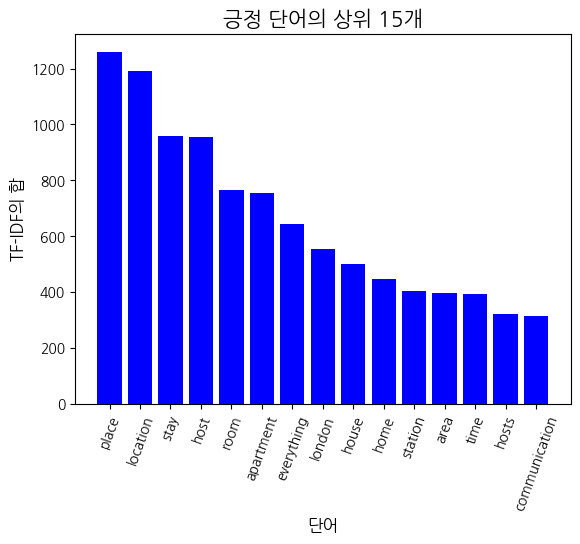

In [78]:
plt.bar(range(max), [i[1] for i in pos_words[:max]], color= "blue")
plt.title("긍정 단어의 상위 %d개" %max, fontsize=15)
plt.xlabel("단어", fontsize= 12)
plt.ylabel("TF-IDF의 합", fontsize=12)
plt.xticks(range(max), [i[0] for i in pos_words[:max]], rotation=70)
plt.show()

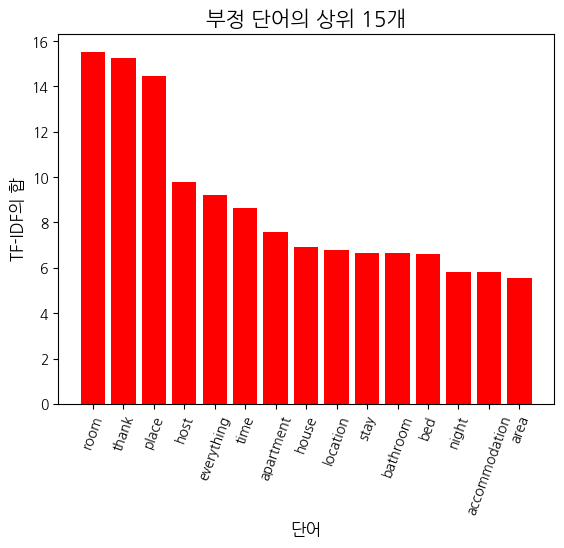

In [80]:
plt.bar(range(max), [i[1] for i in neg_words[:max]], color= "red")
plt.title("부정 단어의 상위 %d개" %max, fontsize=15)
plt.xlabel("단어", fontsize= 12)
plt.ylabel("TF-IDF의 합", fontsize=12)
plt.xticks(range(max), [i[0] for i in neg_words[:max]], rotation=70)
plt.show()

토픽 모델링

- distribution 값은 이 리뷰가 각 토픽에 속할 확률

In [ ]:
# LDA 모델 생성 및 학습
lda_model = LatentDirichletAllocation(n_components=5, max_iter=5, learning_method='online', learning_offset=50., random_state=0)
lda_model.fit(tfidf)

# 리뷰별 토픽 분포 예측
topic_distribution = lda_model.transform(tfidf)

# 각 리뷰의 토픽 분포 확인
for i, review in enumerate(reviews[:10]):  # 첫 10개의 리뷰만 출력
    print(f"Review {i+1}:")
    print(review)
    print(f"Topic Distribution: {topic_distribution[i]}")
    print()

Review 1:
we had a great trip the airbnb is great and very well located 
Topic Distribution: [0.06687063 0.0669043  0.06726565 0.06687033 0.73208908]

Review 2:
great area great hosts and a very comfy bed
Topic Distribution: [0.06208429 0.06211014 0.06261544 0.06208407 0.75110606]

Review 3:
had a wonderful stay at nathans loved the eclectic decor and prime location in notting hill just steps from the tube communication was great and he was able to personally check me in and walk me through everything in the house plus he left detailed instructions everything worked great and i had a lovely and comfortable base for my time in london would definitely stay here again
Topic Distribution: [0.03205742 0.0851387  0.03296659 0.03205377 0.81778351]

Review 4:
cleancomfy and a peaceful spacethere are  rooms in the house and everything was peaceful i felt like i was the only one there there are  showers and  bathrooms so you are hardly out of luck when you need themkitchen is clean and cupboards

In [ ]:
# 각 토픽에 해당하는 단어 추출
def get_top_words(model, feature_names, n_top_words):
    top_words_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        top_words_dict[f"Topic {topic_idx}"] = top_words
    return top_words_dict

n_top_words = 10
feature_names = tfidf_vectorizer.get_feature_names_out()
top_words = get_top_words(lda_model, feature_names, n_top_words)

# 각 토픽의 상위 단어 출력
for topic, words in top_words.items():
    print(f"{topic}: {', '.join(words)}")

Topic 0: discreet, justin, finish, jess, conference, helena, cheaper, boris, monica, vanessas
Topic 1: value, money, mary, setting, apt, defo, accurately, sylvan, sadaf, hilda
Topic 2: good, bit, room, bathroom, small, didnt, kitchen, shower, noise, floor
Topic 3: perfect, max, anna, billie, sally, excel, hassle, extended, bush, reception
Topic 4: great, stay, place, location, host, nice, clean, london, lovely, apartment


감성 분석

<예시> <br>

Review 1:
We had a great trip, the airbnb is great and very well located <br>
Topic Distribution: <br>
[0.0668716   0.06687163  0.06861975
 0.06687151  0.73076551] <br>

<br>

- 각 확률이 5개가 있다. (토픽이 5개가 나왔다는 의미)
- 각 수치가 높을수록 해당 토픽에 속할 확률이 높다는 것

- 5개중 가장 높은 수치가 0.7307 >> 토픽 5번에 속할 확률이 높다는 뜻